In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U scikit-learn
!pip install -U pickle5

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)
Requirement already up-to-date: pickle5 in /usr/local/lib/python3.7/dist-packages (0.0.11)


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'kamrul1157024' 
os.environ['KAGGLE_KEY'] = '821a18913f0da269df38b9f9609ad422'
!kaggle competitions download -c learn-ai-bbc

BBC%20News%20Train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
BBC%20News%20Sample%20Solution.csv: Skipping, found more recently modified local copy (use --force to force download)
BBC%20News%20Test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/BBC%20News%20Test.csv.zip
!unzip /content/BBC%20News%20Train.csv.zip

Archive:  /content/BBC%20News%20Test.csv.zip
replace BBC News Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /content/BBC%20News%20Train.csv.zip
replace BBC News Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import numpy as np
import re
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data=pd.read_csv('/content/BBC News Train.csv')

In [ ]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
data.shape

(1490, 3)

Features of the data

In [ ]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

Checking For Null Values

In [ ]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

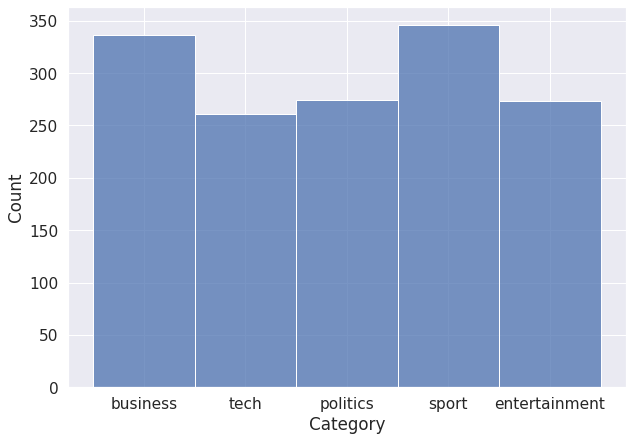

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data.Category)

In [ ]:
data['news_length']=data['Text'].str.len()
data['news_length']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: news_length, Length: 1490, dtype: int64

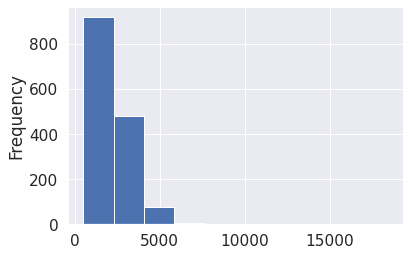

In [ ]:
data['news_length'].plot(kind='hist')

WordCloud to visualize ephasis words

In [ ]:
def create_wordcloud(words,title):
  wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(words)
  plt.figure(figsize=(16,7))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.title(title)
  plt.show()

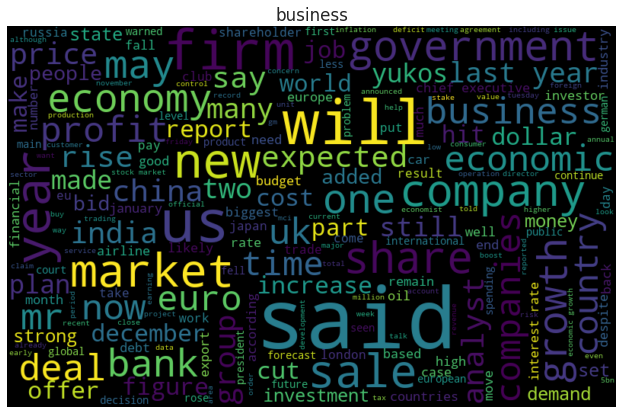

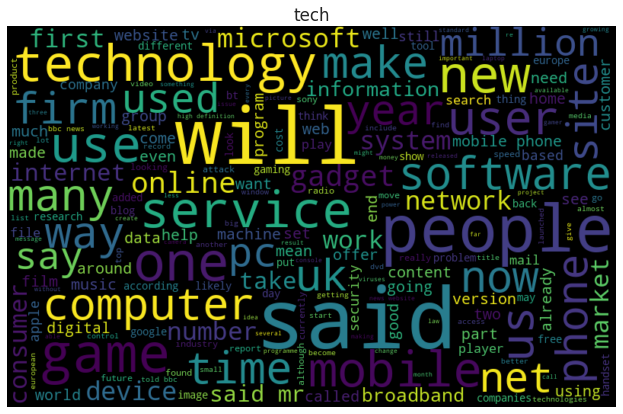

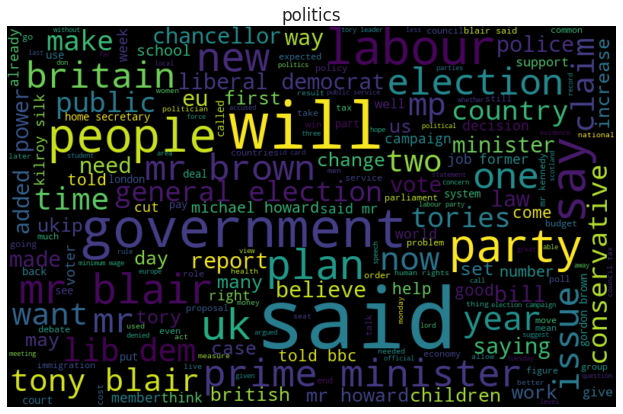

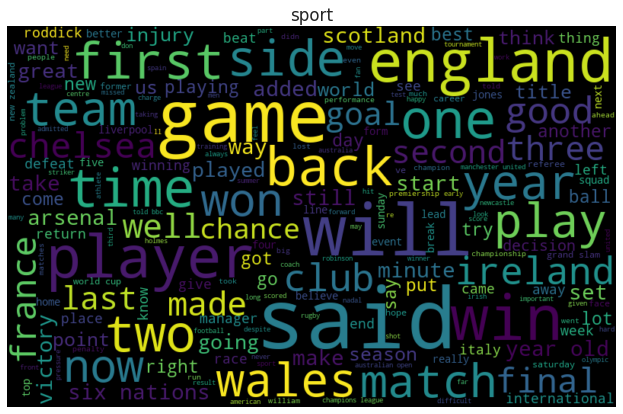

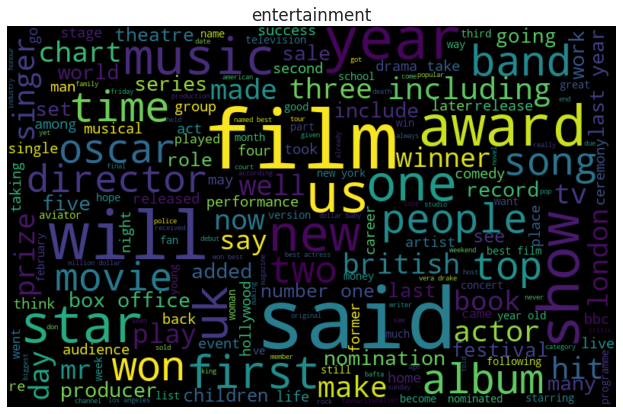

In [ ]:
for current_cat in data.Category.unique():
  subset=data[data.Category==current_cat]
  text=subset.Text.values
  words=' '.join(text)
  create_wordcloud(words,current_cat)


In [ ]:
def process_text(text):
  text=text.lower().replace('\n',' ').replace('\r','').strip()
  text=re.sub(' +',' ',text)
  text=re.sub('[^a-z\s]*','',text)
  stop_words=set(stopwords.words('english'))
  word_tokens=word_tokenize(text)
  filtered_sequence=[w for w in word_tokens if not w in stop_words]
  text=' '.join(filtered_sequence)
  return text

In [ ]:
process_text('I                      eAt rice   ,, 8113 1410 কাজ ')

'eat rice'

In [ ]:
data['Text_parsed']=data['Text'].apply(process_text)

In [ ]:
data.head()

,ArticleId,Text,Category,news_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses payout eighteen former enron dire...


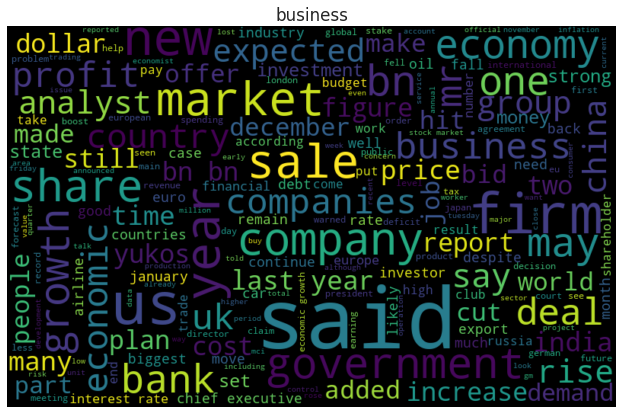

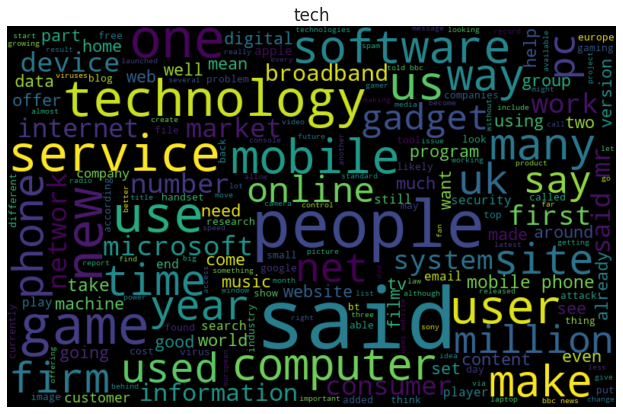

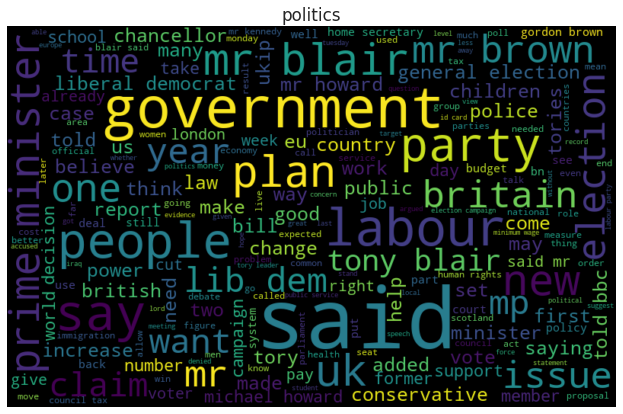

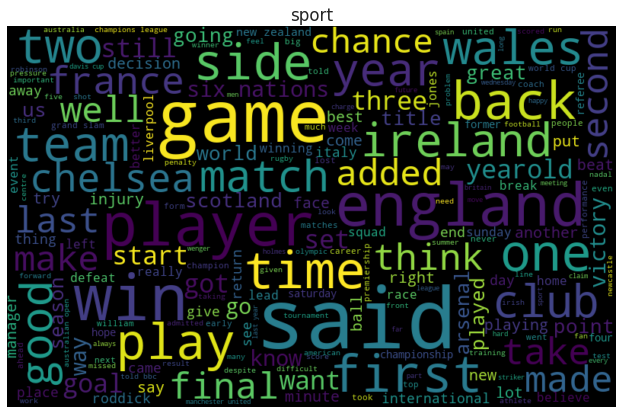

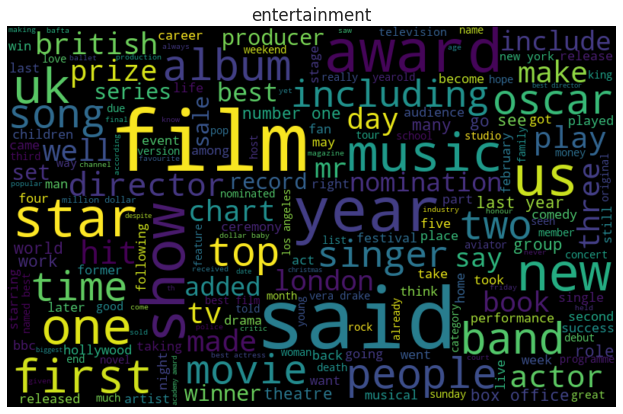

In [ ]:
for current_cat in data.Category.unique():
  subset=data[data.Category==current_cat]
  text=subset.Text_parsed.values
  words=' '.join(text)
  create_wordcloud(words,current_cat)

In [ ]:
data['political']=data['Category'].apply(lambda cat: cat=='politics')

In [ ]:
data.head(50)

,ArticleId,Text,Category,news_length,Text_parsed,political
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,False
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,False
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,False
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,False
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses payout eighteen former enron dire...,False
5,1582,howard truanted to play snooker conservative...,politics,1588,howard truanted play snooker conservative lead...,True
6,651,wales silent on grand slam talk rhys williams ...,sport,1988,wales silent grand slam talk rhys williams say...,False
7,1797,french honour for director parker british film...,entertainment,1342,french honour director parker british film dir...,False
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609,car giant hit mercedes slump slump profitabili...,False
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368,fockers fuel festive film chart comedy meet fo...,False


In [ ]:
label_encoder=preprocessing.LabelEncoder()
data['Category_target']=label_encoder.fit_transform(data['political'])
data.head()

,ArticleId,Text,Category,news_length,Text_parsed,political,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,False,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,False,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,False,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,False,0
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses payout eighteen former enron dire...,False,0


In [ ]:
data.to_csv('BBC_News_Preprorcessing.csv')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


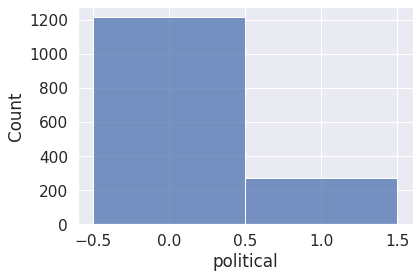

In [ ]:
sns.histplot(data['political'],discrete=True)

Spliting To train and Test Data 

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data['Text_parsed'],
                                               data['Category_target'],
                                               test_size=.2)

In [ ]:
print(f'Train size: {X_train.shape}')
print(f'Test size: {X_test.shape}')

Train size: (1192,)
Test size: (298,)


https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [ ]:
ngram_range=(1,3)
min_df=10
max_df=1.00
max_features=300

In [ ]:
tfidf=TfidfVectorizer(encoding='utf-8',
                      ngram_range=ngram_range,
                      stop_words=None,
                      lowercase=False,
                      max_df=max_df,
                      min_df=min_df,
                      max_features=max_features,
                      norm='l2',
                      sublinear_tf=True)

In [ ]:
tfidf.fit(X_train)

TfidfVectorizer(lowercase=False, max_features=300, min_df=10,
                ngram_range=(1, 3), sublinear_tf=True)

In [ ]:
features_train=tfidf.transform(X_train).toarray()
labels_train=Y_train

In [ ]:
features_test=tfidf.transform(X_test).toarray()
labels_test=Y_test

In [ ]:
print(f'Train size: {features_train.shape}')

Train size: (1192, 300)


In [ ]:
pickle.dump(tfidf, open("/content/drive/MyDrive/AI/tfidf_english_pickle.pkl", "wb"))

In [ ]:
import time
start_time = time.time()
tf_file = pickle.load(open("/content/drive/MyDrive/AI/tfidf_english_pickle.pkl", 'rb'))

tfidf_new=TfidfVectorizer(encoding='utf-8',
                ngram_range=ngram_range,
                stop_words=None,
                lowercase=False,
                max_df=max_df,
                min_df=min_df,
                max_features=max_features,
                norm='l2',
                vocabulary = tf_file.vocabulary_,
                sublinear_tf=True)
print("Execution time %s ms " % ((time.time() - start_time)*1000))

Execution time 158.25963020324707 ms 


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(model,model_predictions):
  model_name = type(model).__name__
  matrix=confusion_matrix(labels_test,model_predictions)
  df_cm = pd.DataFrame(matrix,range(2),range(2) )
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g',cmap='Reds') # font size
  plt.gcf().set_size_inches(3,3)
  plt.title(model_name)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  TP=matrix[0][0]
  TN=matrix[1][1]
  FP=matrix[1][0]
  FN=matrix[0][1]
  TN, FP, FN, TP =matrix.ravel()
  TPR=TP/(TP+FN)
  TNR=TN/(FP+TN)
  FPR=FP/(FP+TN)
  FNR=FN/(TP+FN)
  format=lambda x:float("{:.2f}".format(x))
  plt.text(3.5,.5, ("TPR= TP/Total_Postive= "+str(format(TPR))+"       " + "TFR=TN/Total_Negative= "+str(format(TNR))), ha='left', rotation=0, wrap=True)
  plt.text(3.5,1, ("FPR=FP/Total_Positive= "+str(format(FPR))+"       " + "FNR=FN/Total_Negative= "+str(format(FNR))), ha='left', rotation=0, wrap=True)
  plt.show()


Random Forest 

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest=RandomForestClassifier()
model_random_forest.fit(features_train,labels_train)
model_random_forest_predictions=model_random_forest.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_random_forest_predictions))
print(classification_report(labels_test,model_random_forest_predictions))

Accuracy 0.9463087248322147
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       237
           1       1.00      0.74      0.85        61

    accuracy                           0.95       298
   macro avg       0.97      0.87      0.91       298
weighted avg       0.95      0.95      0.94       298



In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic_regression=LogisticRegression()
model_logistic_regression.fit(features_train,labels_train)
model_logistic_regression_predictions=model_logistic_regression.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_logistic_regression_predictions))
print(classification_report(labels_test,model_logistic_regression_predictions))

Accuracy 0.9463087248322147
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       237
           1       0.98      0.75      0.85        61

    accuracy                           0.95       298
   macro avg       0.96      0.87      0.91       298
weighted avg       0.95      0.95      0.94       298



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(features_train,labels_train)
model_knn_predictions=model_knn.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_knn_predictions))
print(classification_report(labels_test,model_knn_predictions))

Accuracy 0.9664429530201343
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       237
           1       0.96      0.87      0.91        61

    accuracy                           0.97       298
   macro avg       0.97      0.93      0.95       298
weighted avg       0.97      0.97      0.97       298



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(features_train,labels_train)
model_decision_tree_predictions=model_decision_tree.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_decision_tree_predictions))
print(classification_report(labels_test,model_decision_tree_predictions))

Accuracy 0.9228187919463087
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       237
           1       0.84      0.77      0.80        61

    accuracy                           0.92       298
   macro avg       0.89      0.87      0.88       298
weighted avg       0.92      0.92      0.92       298



In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_nb=GaussianNB()
model_gaussian_nb.fit(features_train,labels_train)
model_gaussian_nb_predictions=model_gaussian_nb.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_gaussian_nb_predictions))
print(classification_report(labels_test,model_gaussian_nb_predictions))

Accuracy 0.9362416107382551
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       237
           1       0.79      0.93      0.86        61

    accuracy                           0.94       298
   macro avg       0.89      0.94      0.91       298
weighted avg       0.94      0.94      0.94       298



In [ ]:
pickle.dump(model_gaussian_nb, open('gaussian_naive_bias.pickle', 'wb'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(features_train,labels_train)
model_multinomial_nb_predictions=model_multinomial_nb.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_multinomial_nb_predictions))
print(classification_report(labels_test,model_multinomial_nb_predictions))

Accuracy 0.9463087248322147
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       237
           1       0.98      0.75      0.85        61

    accuracy                           0.95       298
   macro avg       0.96      0.87      0.91       298
weighted avg       0.95      0.95      0.94       298



In [ ]:
from sklearn.svm import SVC
model_svm=SVC(kernel='sigmoid',probability=True)
model_svm.fit(features_train,labels_train)
model_svm_predictions=model_svm.predict(features_test)
print('Accuracy',accuracy_score(labels_test,model_svm_predictions))
print(classification_report(labels_test,model_svm_predictions))

Accuracy 0.9731543624161074
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       237
           1       0.96      0.90      0.93        61

    accuracy                           0.97       298
   macro avg       0.97      0.95      0.96       298
weighted avg       0.97      0.97      0.97       298



In [ ]:
pickle.dump(model_svm, open('svm_sigmoid.pickle', 'wb'))

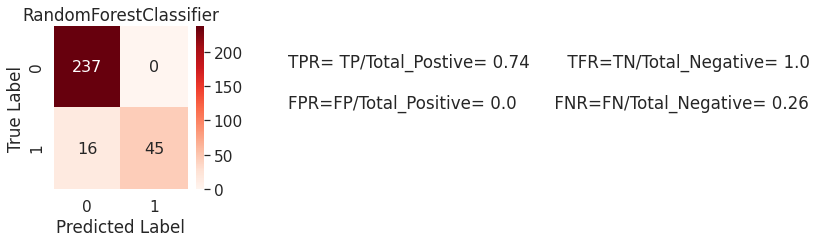

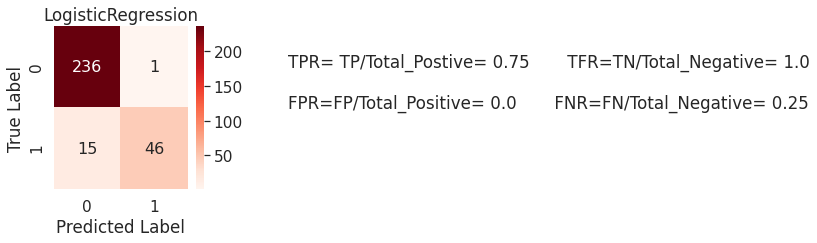

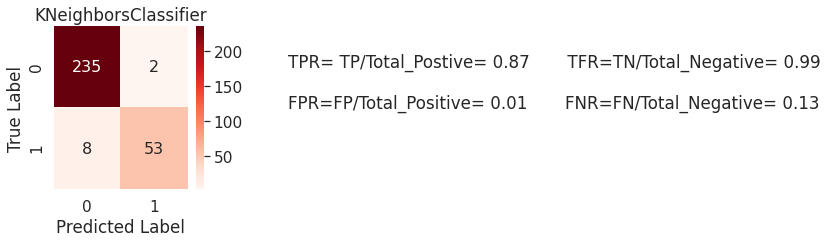

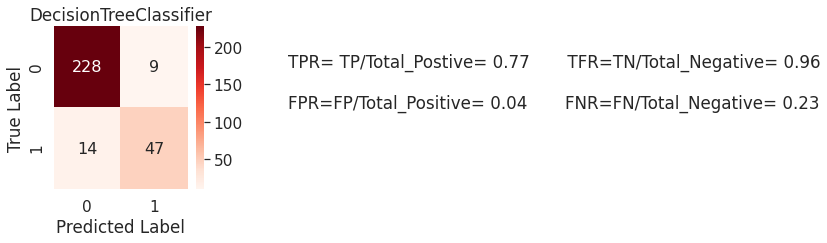

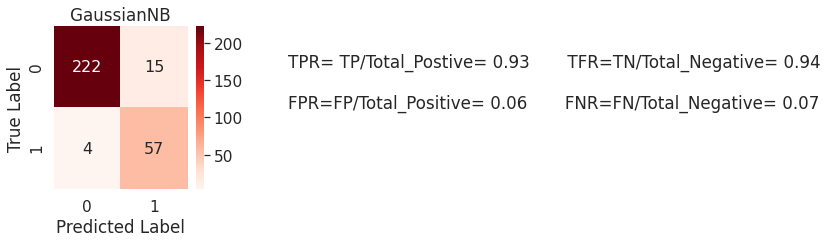

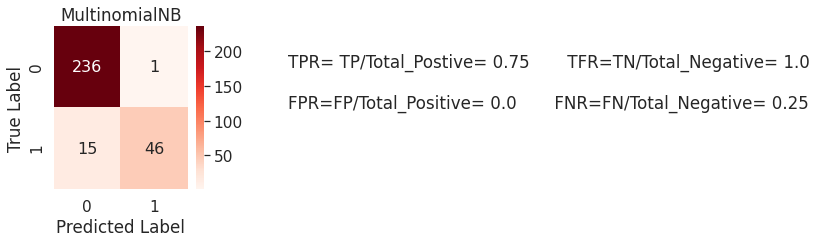

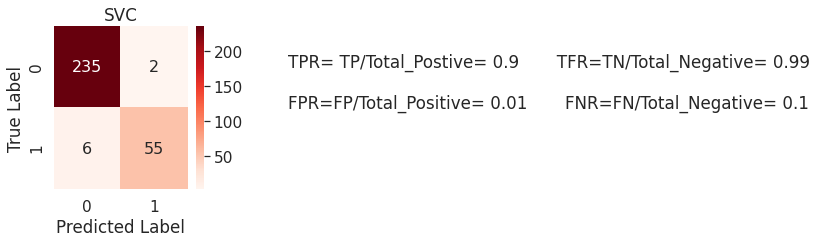

In [ ]:
plot_confusion_matrix(model_random_forest,model_random_forest_predictions)
plot_confusion_matrix(model_logistic_regression,model_logistic_regression_predictions)
plot_confusion_matrix(model_knn,model_knn_predictions)
plot_confusion_matrix(model_decision_tree,model_decision_tree_predictions)
plot_confusion_matrix(model_gaussian_nb,model_gaussian_nb_predictions)
plot_confusion_matrix(model_multinomial_nb,model_multinomial_nb_predictions)
plot_confusion_matrix(model_svm,model_svm_predictions)

In [ ]:
import time

In [ ]:
start_time = time.time()
text = "Indian Defence Minister Rajnath Singh today said the unfenced stretch of Dhubri district of Assam's border with Bangladesh will be completely sealed off if Bharatiya Janata Party returns to power in the state.   Addressing his first assembly election rally in Bishwanath in Assam, he said the BJP-led government has sealed a major part of the India-Bangladesh border and installed electronic surveillance along the riverine stretch.  \"We have sealed the international border in Dhubri. Whatever little stretch is left unfenced will be completely seated if the BJP returns to power in Assam,\" Rajnath said.  He said the BJP government in Tripura is also working towards stopping \"illegal immigration\" from the neighbouring country, our New Delhi correspondent reports." #@param {type:"string"}
text=process_text(text)
text_for_pred=tfidf_new.fit_transform([text]).toarray()
model_svm_nb_predictions=model_svm.predict_proba(text_for_pred)
class_probability=model_svm_nb_predictions.flatten()
print(class_probability)
post_type= lambda x: "Not Political" if x[0]>x[1]  else  "Political"
text=text.replace('\u0964','\u0964 \n')
print(text)
print(post_type(class_probability))
print("\n")
print("Execution time %s ms " % ((time.time() - start_time)*1000))

[0.01773834 0.98226166]
indian defence minister rajnath singh today said unfenced stretch dhubri district assams border bangladesh completely sealed bharatiya janata party returns power state addressing first assembly election rally bishwanath assam said bjpled government sealed major part indiabangladesh border installed electronic surveillance along riverine stretch sealed international border dhubri whatever little stretch left unfenced completely seated bjp returns power assam rajnath said said bjp government tripura also working towards stopping illegal immigration neighbouring country new delhi correspondent reports
Political


Execution time 7.055759429931641 ms 


In [ ]:
# from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# X_test.shape

In [ ]:
# vocbulary_size=10000

In [ ]:
# one_hot_representation=[one_hot(words,vocbulary_size) for words in X_test]
# print(one_hot_representation[0])
# print(one_hot_representation[1])

In [ ]:
# from tensorflow.keras.layers import Embedding
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential

In [ ]:
# sentence_length=50
# embedded_docs = pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)
# print(embedded_docs)

In [ ]:
# features_dimentions=20

In [ ]:
# model=Sequential()
# model.add(Embedding(vocbulary_size,features_dimentions,input_length=sentence_length))
# model.compile(optimizer='adam')

In [ ]:
# model.summary()

In [ ]:
# model.predict(embedded_docs)[0].shape

In [ ]:
# def getEmbedding(model,X):
#   one_hot_representation=[one_hot(words,vocbulary_size) for words in X]
#   embedded_docs = pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)
#   # model=Sequential()
#   # model.add(Embedding(vocbulary_size,features_dimentions,input_length=sentence_length))
#   # model.compile(optimizer='adam')
#   return model.predict(embedded_docs)


In [ ]:
# X_train_embedded=getEmbedding(model,X_train)
# X_test_embedded=getEmbedding(model,X_test)

In [ ]:
# X_train_embedded.shape